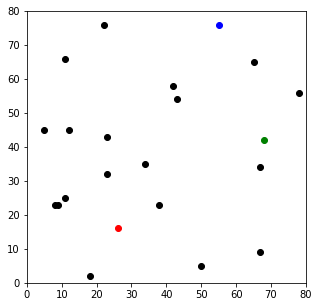

In [17]:
#manual

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x' : [23,50,18,38,42,78,12,11,34,65,9,5,8,22,11,23,67,43,67],
    'y' : [43,5,2,23,58,56,45,25,35,65,23,45,23,76,66,32,9,54,34]
})

np.random.seed(200)
k = 3

centroids = {
    i+1 : [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range (k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  23  43        27.166155        45.011110        45.967380        1     r
1  50   5        26.400758        41.146081        71.175839        1     r
2  18   2        16.124515        64.031242        82.734515        1     r
3  38  23        13.892444        35.510562        55.659680        1     r
4  42  58        44.944410        30.528675        22.203603        3     b


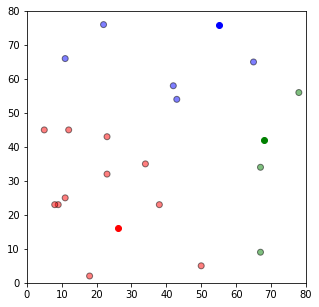

In [18]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df,centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

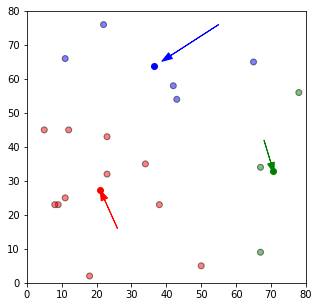

In [19]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length = 3, fc = colmap[i], ec = colmap[i])
plt.show()   
    


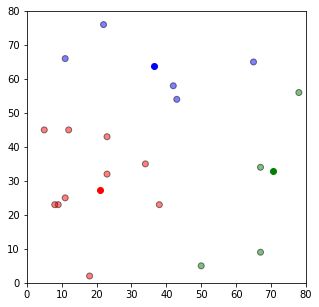

In [20]:
df = assignment(df, centroids)

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

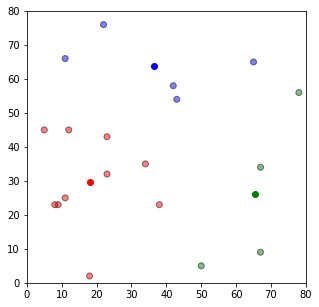

In [21]:
while True:
    closest_centroids = df['closest'].copy(deep  =True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
        
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [23]:
#library sklearn

df = pd.DataFrame({
    'x' : [23,50,18,38,42,78,12,11,34,65,9,5,8,22,11,23,67,43,67],
    'y' : [43,5,2,23,58,56,45,25,35,65,23,45,23,76,66,32,9,54,34]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

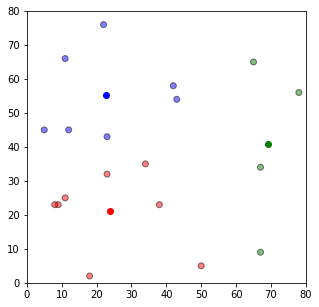

In [25]:
fig = plt.figure(figsize = (5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color = colors1, alpha = 0.5, edgecolor = 'k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color = colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()